<a href="https://colab.research.google.com/github/jrobertosouza-git/Data-Science-Job-Market-Analysis/blob/master/tcc_puc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sumário
[](http://) 
1. [Introdução](#Introdução)  
    1.1. [Contextualização](#Contextualização)  
    1.2. [O problema proposto](#O-problema-proposto)  
2. [Coleta de Dados](#Coleta-de-Dados)  
3. [Processamento/Tratamento de Dados](#Processamento/Tratamento-de-Dados)  
4. [Análise e Exploração dos Dados](#Análise-e-Exploração-dos-Dados)  
5. [Criação de Modelos de Machine Learning](#Criação-de-Modelos-de-Machine-Learning)  
6. [Apresentação dos Resultados](#Apresentação-dos-Resultados)  
7. [Links](#Links)  
8. [REFERÊNCIAS](#REFERÊNCIAS)  
9. [APÊNDICE](#APÊNDICE)  


In [ ]:
# Importando bibliotecas de código

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregando conjunto de dados

dados = pd.read_csv('/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv')

# Separando váriaveis

colunas_numericas = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
colunas_categoricas = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
variavel_resposta = ['Revenue']

In [ ]:
# Verificando  valores ausentes
percent_nulos = 100*dados.isnull().sum()/dados.shape[0]

# Verificando existência de valores negativos
percent_negativos = 100*dados[dados[colunas_numericas] < 0].count()/dados.shape[0]

pd.DataFrame({'% Valores Negativos':percent_negativos, '% Valores Nulos':percent_nulos}) 

,% Valores Negativos,% Valores Nulos
Administrative,0.00000,0.113544
Administrative_Duration,0.26764,0.113544
Informational,0.00000,0.113544
Informational_Duration,0.26764,0.113544
ProductRelated,0.00000,0.113544
ProductRelated_Duration,0.26764,0.113544
BounceRates,0.00000,0.113544
ExitRates,0.00000,0.113544
PageValues,0.00000,0.000000
SpecialDay,0.00000,0.000000


In [ ]:
# Tratando valores nulos e negativos

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Transformando negativos em nulos

dados[dados[colunas_numericas] < 0] = np.nan

dados =  pd.concat([pd.DataFrame(imputer.fit_transform(dados[colunas_numericas]),columns=colunas_numericas),dados[colunas_categoricas], dados[variavel_resposta]], axis=1)

dados_transf = dados.copy()


In [ ]:
dados.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330,NaN,NaN,NaN,2.3163,3.32116,0,0,1,4,27
Administrative_Duration,12330,NaN,NaN,NaN,80.8475,176.767,0,0,8,93.2562,3398.75
Informational,12330,NaN,NaN,NaN,0.503406,1.27009,0,0,0,0,24
Informational_Duration,12330,NaN,NaN,NaN,34.4699,140.75,0,0,0,0,2549.38
ProductRelated,12330,NaN,NaN,NaN,31.7483,44.4675,0,7,18,38,705
ProductRelated_Duration,12330,NaN,NaN,NaN,1196.98,1912.63,0,189,602.5,1464.16,63973.5
BounceRates,12330,NaN,NaN,NaN,0.0221309,0.0484039,0,0,0.00311941,0.0166667,0.2
ExitRates,12330,NaN,NaN,NaN,0.0429822,0.0485035,0,0.0142857,0.0251245,0.05,0.2
PageValues,12330,NaN,NaN,NaN,5.88926,18.5684,0,0,0,0,361.764
SpecialDay,12330,NaN,NaN,NaN,0.0614274,0.198917,0,0,0,0,1


In [ ]:
# Verificando  valores ausentes
percent_nulos = 100*dados.isnull().sum()/dados.shape[0]

# Verificando existência de valores negativos
percent_negativos = 100*dados[dados[colunas_numericas] < 0].count()/dados.shape[0]

pd.DataFrame({'% Valores Negativos':percent_negativos, '% Valores Nulos':percent_nulos}) 

,% Valores Negativos,% Valores Nulos
Administrative,0.0,0.0
Administrative_Duration,0.0,0.0
Informational,0.0,0.0
Informational_Duration,0.0,0.0
ProductRelated,0.0,0.0
ProductRelated_Duration,0.0,0.0
BounceRates,0.0,0.0
ExitRates,0.0,0.0
PageValues,0.0,0.0
SpecialDay,0.0,0.0


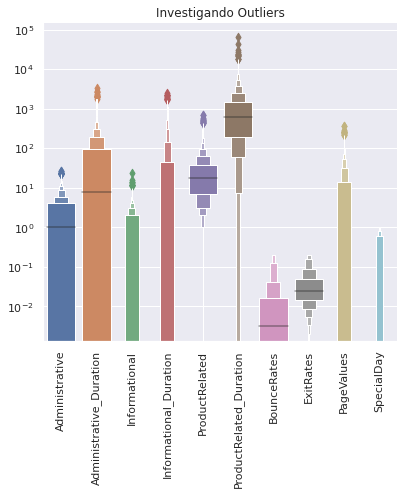

In [ ]:
# Tratando Outliers

# Investigando distribuições
sns.catplot(kind="boxen", data=dados[colunas_numericas], aspect=1.2)
plt.title('Investigando Outliers')
plt.xticks(rotation=90)
plt.yscale("log")

In [ ]:
# Aplicando IsolationForest para identificar Outliers
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100)
Out= clf.fit_predict(dados_transf[colunas_numericas])  # fit 100 trees 
dt = pd.concat([dados_transf[colunas_numericas], dados_transf[colunas_categoricas], dados_transf[variavel_resposta], pd.DataFrame(Out, columns=['Sel'])], axis=1)
dp = dt[dt['Sel'] == -1]

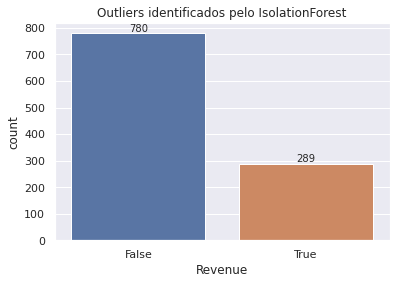

In [ ]:
plt.title('Outliers identificados pelo IsolationForest')
sns.countplot(dp['Revenue'])
# Imprimindo porcentagens no topo das barras
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%i' % p.get_height(), ha='center', va='bottom')

In [ ]:
# Transformação Logarítimica

dados_transf['Administrative']=dados_transf['Administrative'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['Administrative_Duration']=dados_transf['Administrative_Duration'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['Informational']=dados_transf['Informational'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['Informational_Duration']=dados_transf['Informational_Duration'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['ProductRelated']=dados_transf['ProductRelated'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['ProductRelated_Duration']=dados_transf['ProductRelated_Duration'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['ExitRates']=dados_transf['ExitRates'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['PageValues']=dados_transf['PageValues'].apply(lambda x: np.log10(x) if x > 1 else x)
dados_transf['BounceRates']=dados_transf['BounceRates'].apply(lambda x: np.log10(x) if x > 1 else x)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

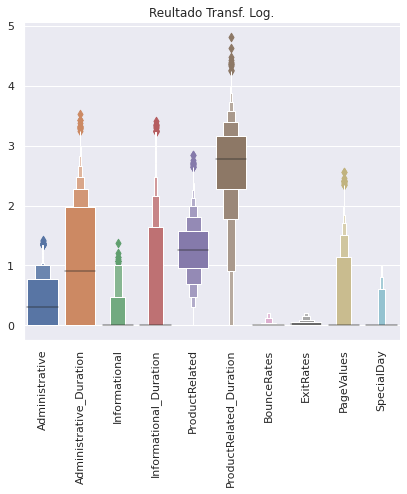

In [ ]:
sns.catplot(kind="boxen", data=dados_transf[colunas_numericas], aspect=1.2)
plt.title('Reultado Transf. Log.')
plt.xticks(rotation=90)


In [ ]:
# Redimensionando valores para o intervalo [0, 1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dados_transf[colunas_numericas] = scaler.fit_transform(dados_transf[colunas_numericas])

#dados_transf[colunas_numericas]= dados_transf[colunas_numericas].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [ ]:
dados.describe(include='all')[colunas_numericas].transpose()[['min','max']]


,min,max
Administrative,0.0,27.000000
Administrative_Duration,0.0,3398.750000
Informational,0.0,24.000000
Informational_Duration,0.0,2549.375000
ProductRelated,0.0,705.000000
ProductRelated_Duration,0.0,63973.522230
BounceRates,0.0,0.200000
ExitRates,0.0,0.200000
PageValues,0.0,361.763742
SpecialDay,0.0,1.000000


In [ ]:
dados_transf.describe(include='all')[colunas_numericas].transpose()[['min','max']]

,min,max
Administrative,0.0,1.0
Administrative_Duration,0.0,1.0
Informational,0.0,1.0
Informational_Duration,0.0,1.0
ProductRelated,0.0,1.0
ProductRelated_Duration,0.0,1.0
BounceRates,0.0,1.0
ExitRates,0.0,1.0
PageValues,0.0,1.0
SpecialDay,0.0,1.0


In [ ]:
# Usando Get_dummies para criar variáveis fictícias para dados categóricos

dados_transf.loc[:,['Region','Browser','OperatingSystems','Weekend']]=dados_transf.loc[:,['Region','Browser','OperatingSystems','Weekend']].astype(str) 

dados_transf = pd.concat([dados_transf[colunas_numericas],pd.get_dummies(dados_transf[colunas_categoricas]), dados_transf[variavel_resposta]], axis=1)

In [ ]:
pd.DataFrame(dados_transf.columns, columns=['Variáveis'])

,Variáveis
0,Administrative
1,Administrative_Duration
2,Informational
3,Informational_Duration
4,ProductRelated
5,ProductRelated_Duration
6,BounceRates
7,ExitRates
8,PageValues
9,SpecialDay


In [ ]:
dados.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,8.0,0.0,0.0,1.0,602.500000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
dados.describe(include='all').transpose().iloc[:,[0,1,2,3,6,10]]

,count,unique,top,freq,min,max
Administrative,12330,NaN,NaN,NaN,0,27
Administrative_Duration,12330,NaN,NaN,NaN,0,3398.75
Informational,12330,NaN,NaN,NaN,0,24
Informational_Duration,12330,NaN,NaN,NaN,0,2549.38
ProductRelated,12330,NaN,NaN,NaN,0,705
ProductRelated_Duration,12330,NaN,NaN,NaN,0,63973.5
BounceRates,12330,NaN,NaN,NaN,0,0.2
ExitRates,12330,NaN,NaN,NaN,0,0.2
PageValues,12330,NaN,NaN,NaN,0,361.764
SpecialDay,12330,NaN,NaN,NaN,0,1


In [ ]:
def autolabel(ax):
    for p in ax.patches:
        #ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.0f' % p.get_height(), ha='center', va='bottom')
        ax.text(p.get_x() + p.get_width()/2., p.get_height()+100, '%2.1f %%' % (100*p.get_height()/dados['Revenue'].count()), ha='center', va='bottom', rotation=90)

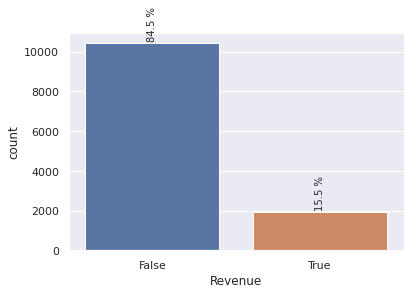

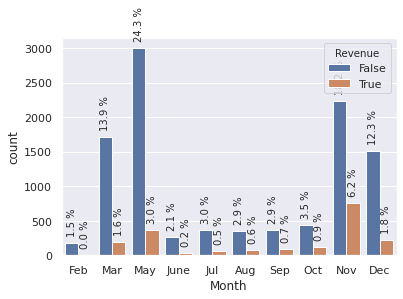

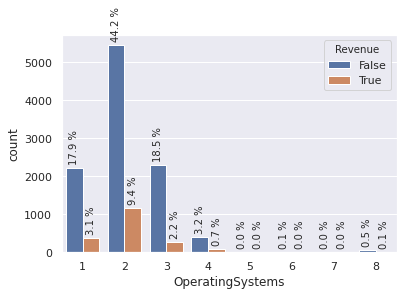

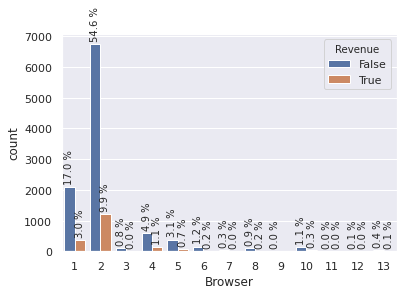

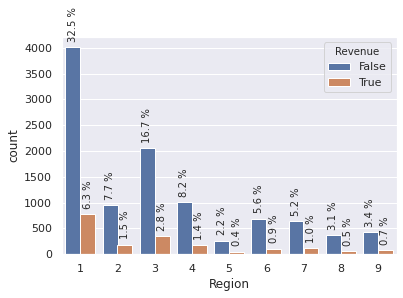

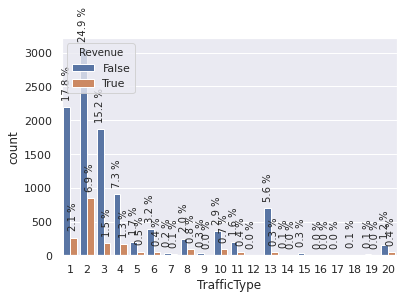

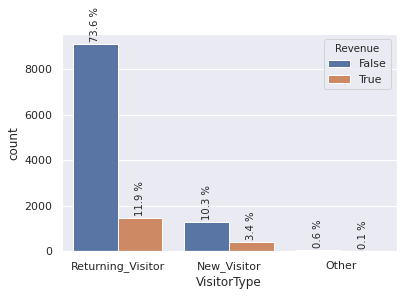

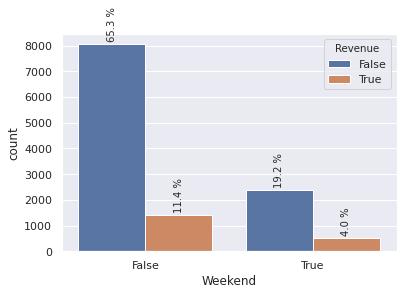

In [ ]:
ax = sns.countplot(dados['Revenue'])
autolabel(ax)
plt.show()
for i in colunas_categoricas:
    plt.figure(figsize=(6,4))
    if i == "Month":
        o=('Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
        ax = sns.countplot(x=i, hue='Revenue', data=dados, order=o)
    else:
        ax = sns.countplot(x=i, hue='Revenue', data=dados)
    autolabel(ax)
    plt.show()

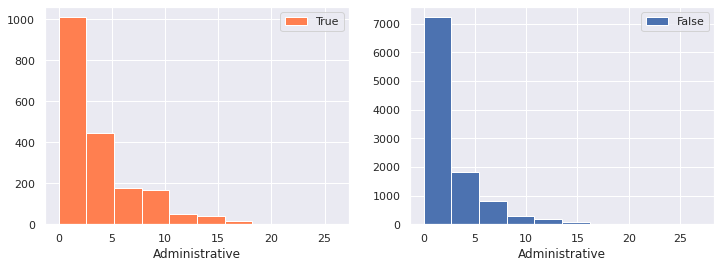

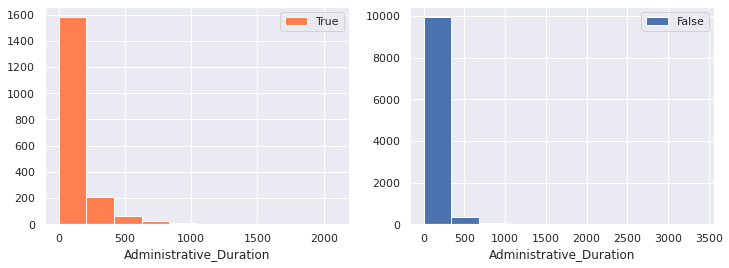

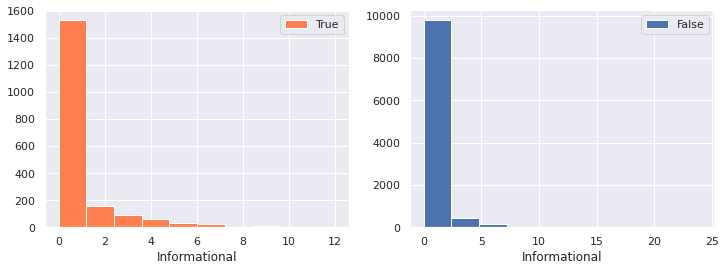

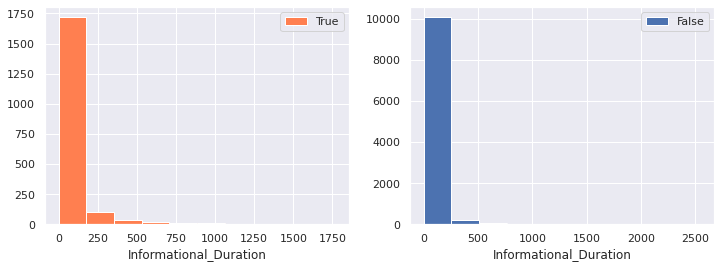

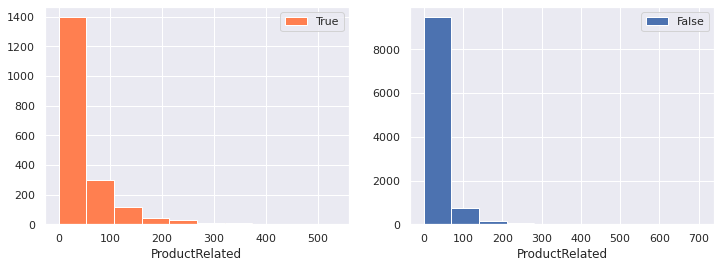

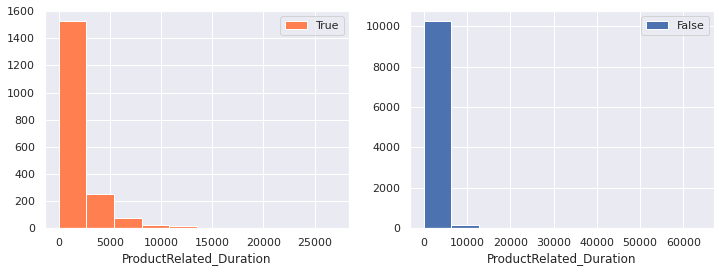

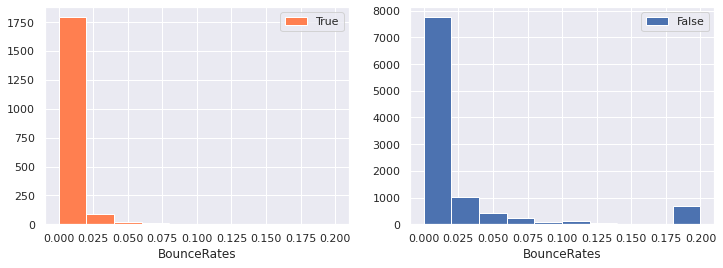

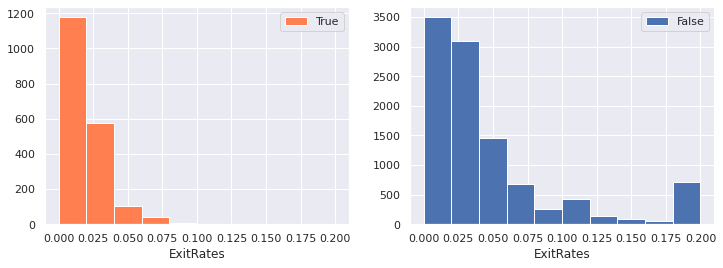

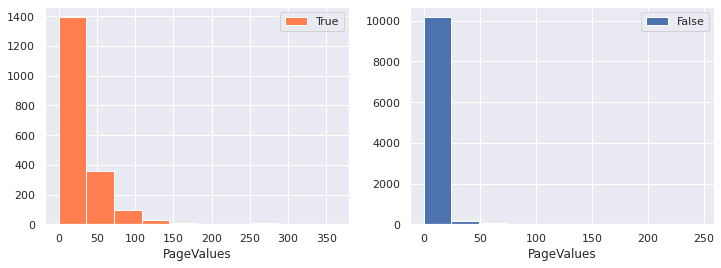

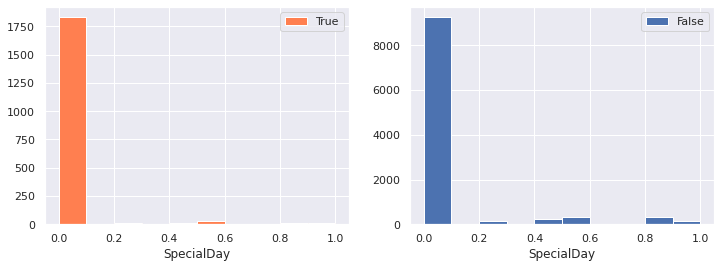

In [ ]:
for i in colunas_numericas:
    f, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.distplot(dados.loc[(dados['Revenue']==True), i], kde=False, ax=axes[0],color="coral", bins=10, hist_kws={"alpha":1},label="True")
    axes[0].legend()
    sns.distplot(dados.loc[(dados['Revenue']==False), i], kde=False, ax=axes[1], hist_kws=dict(alpha=1), bins=10,label="False")
    axes[1].legend()
    plt.show()

In [ ]:
dados.groupby(['Month','Revenue'])['SpecialDay'].sum()

Month  Revenue
Aug    False        0.0
       True         0.0
Dec    False        0.0
       True         0.0
Feb    False       41.2
       True         1.8
Jul    False        0.0
       True         0.0
June   False        0.0
       True         0.0
Mar    False        0.0
       True         0.0
May    False      672.0
       True        42.4
Nov    False        0.0
       True         0.0
Oct    False        0.0
       True         0.0
Sep    False        0.0
       True         0.0
Name: SpecialDay, dtype: float64

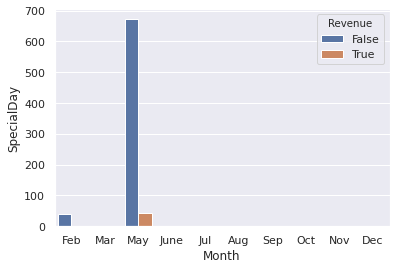

In [ ]:
# Análise multivariada

o = ('Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
ax = sns.barplot(x="Month", y="SpecialDay", hue="Revenue", data=dados, order=o, dodge=True, ci=0, estimator=sum)#lambda x: sum(x))
#ax = sns.barplot(x="Month", y="SpecialDay", hue="Revenue", data=dados, order=o, dodge=True, ci=0)
#ax = sns.boxenplot(x="Month", y="SpecialDay", hue="Revenue", data=dados)
#autolabel(ax)
plt.show()

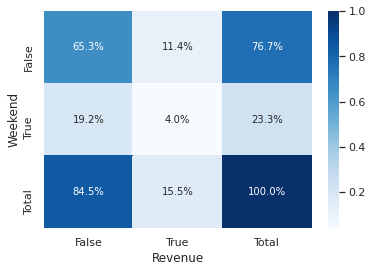

In [ ]:
sns.heatmap(pd.crosstab(dados.Weekend, dados.Revenue, margins=True, margins_name="Total", normalize=True), annot=True, fmt=".1%", cmap="Blues")

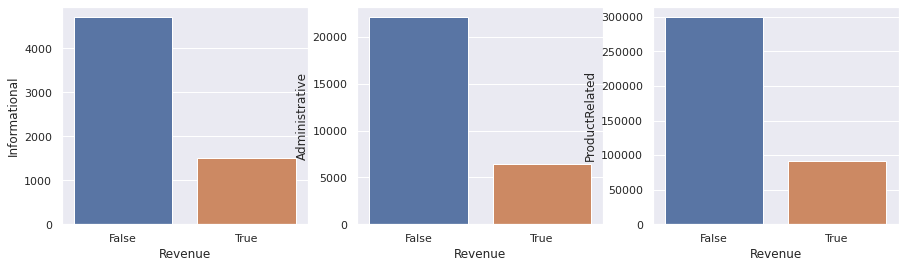

In [ ]:
aux = dados[['Administrative','Informational','ProductRelated', 'Revenue']].groupby('Revenue').sum()
aux = pd.concat([aux, pd.Series(aux.index.transpose().astype(str))], axis=1)
f, axes = plt.subplots(1, 3, figsize=(15,4))
sns.barplot(y=aux['Informational'], x='Revenue', data=aux, ci=0, ax=axes[0])
sns.barplot(y=aux['Administrative'], x='Revenue', data=aux, ci=0, ax=axes[1])
sns.barplot(y=aux['ProductRelated'], x='Revenue', data=aux, ci=0, ax=axes[2]); plt.show()


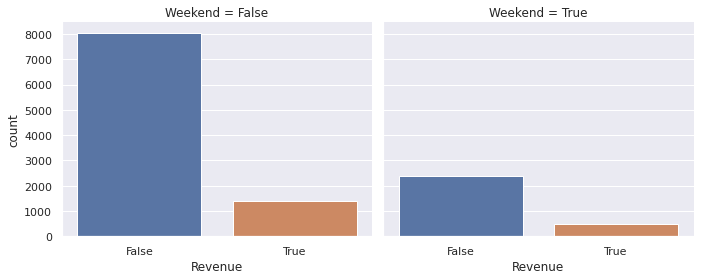

In [ ]:
sns.catplot(x="Revenue", col="Weekend", data=dados, kind="count", height=4, aspect=1.2)

In [ ]:
#dataframe.col3, mapping_index = pd.Series(dataframe.col3).factorize()
pd.Series(dados.Month).factorize()

(array([0, 0, 0, ..., 7, 7, 7]),
 Index(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec'], dtype='object'))

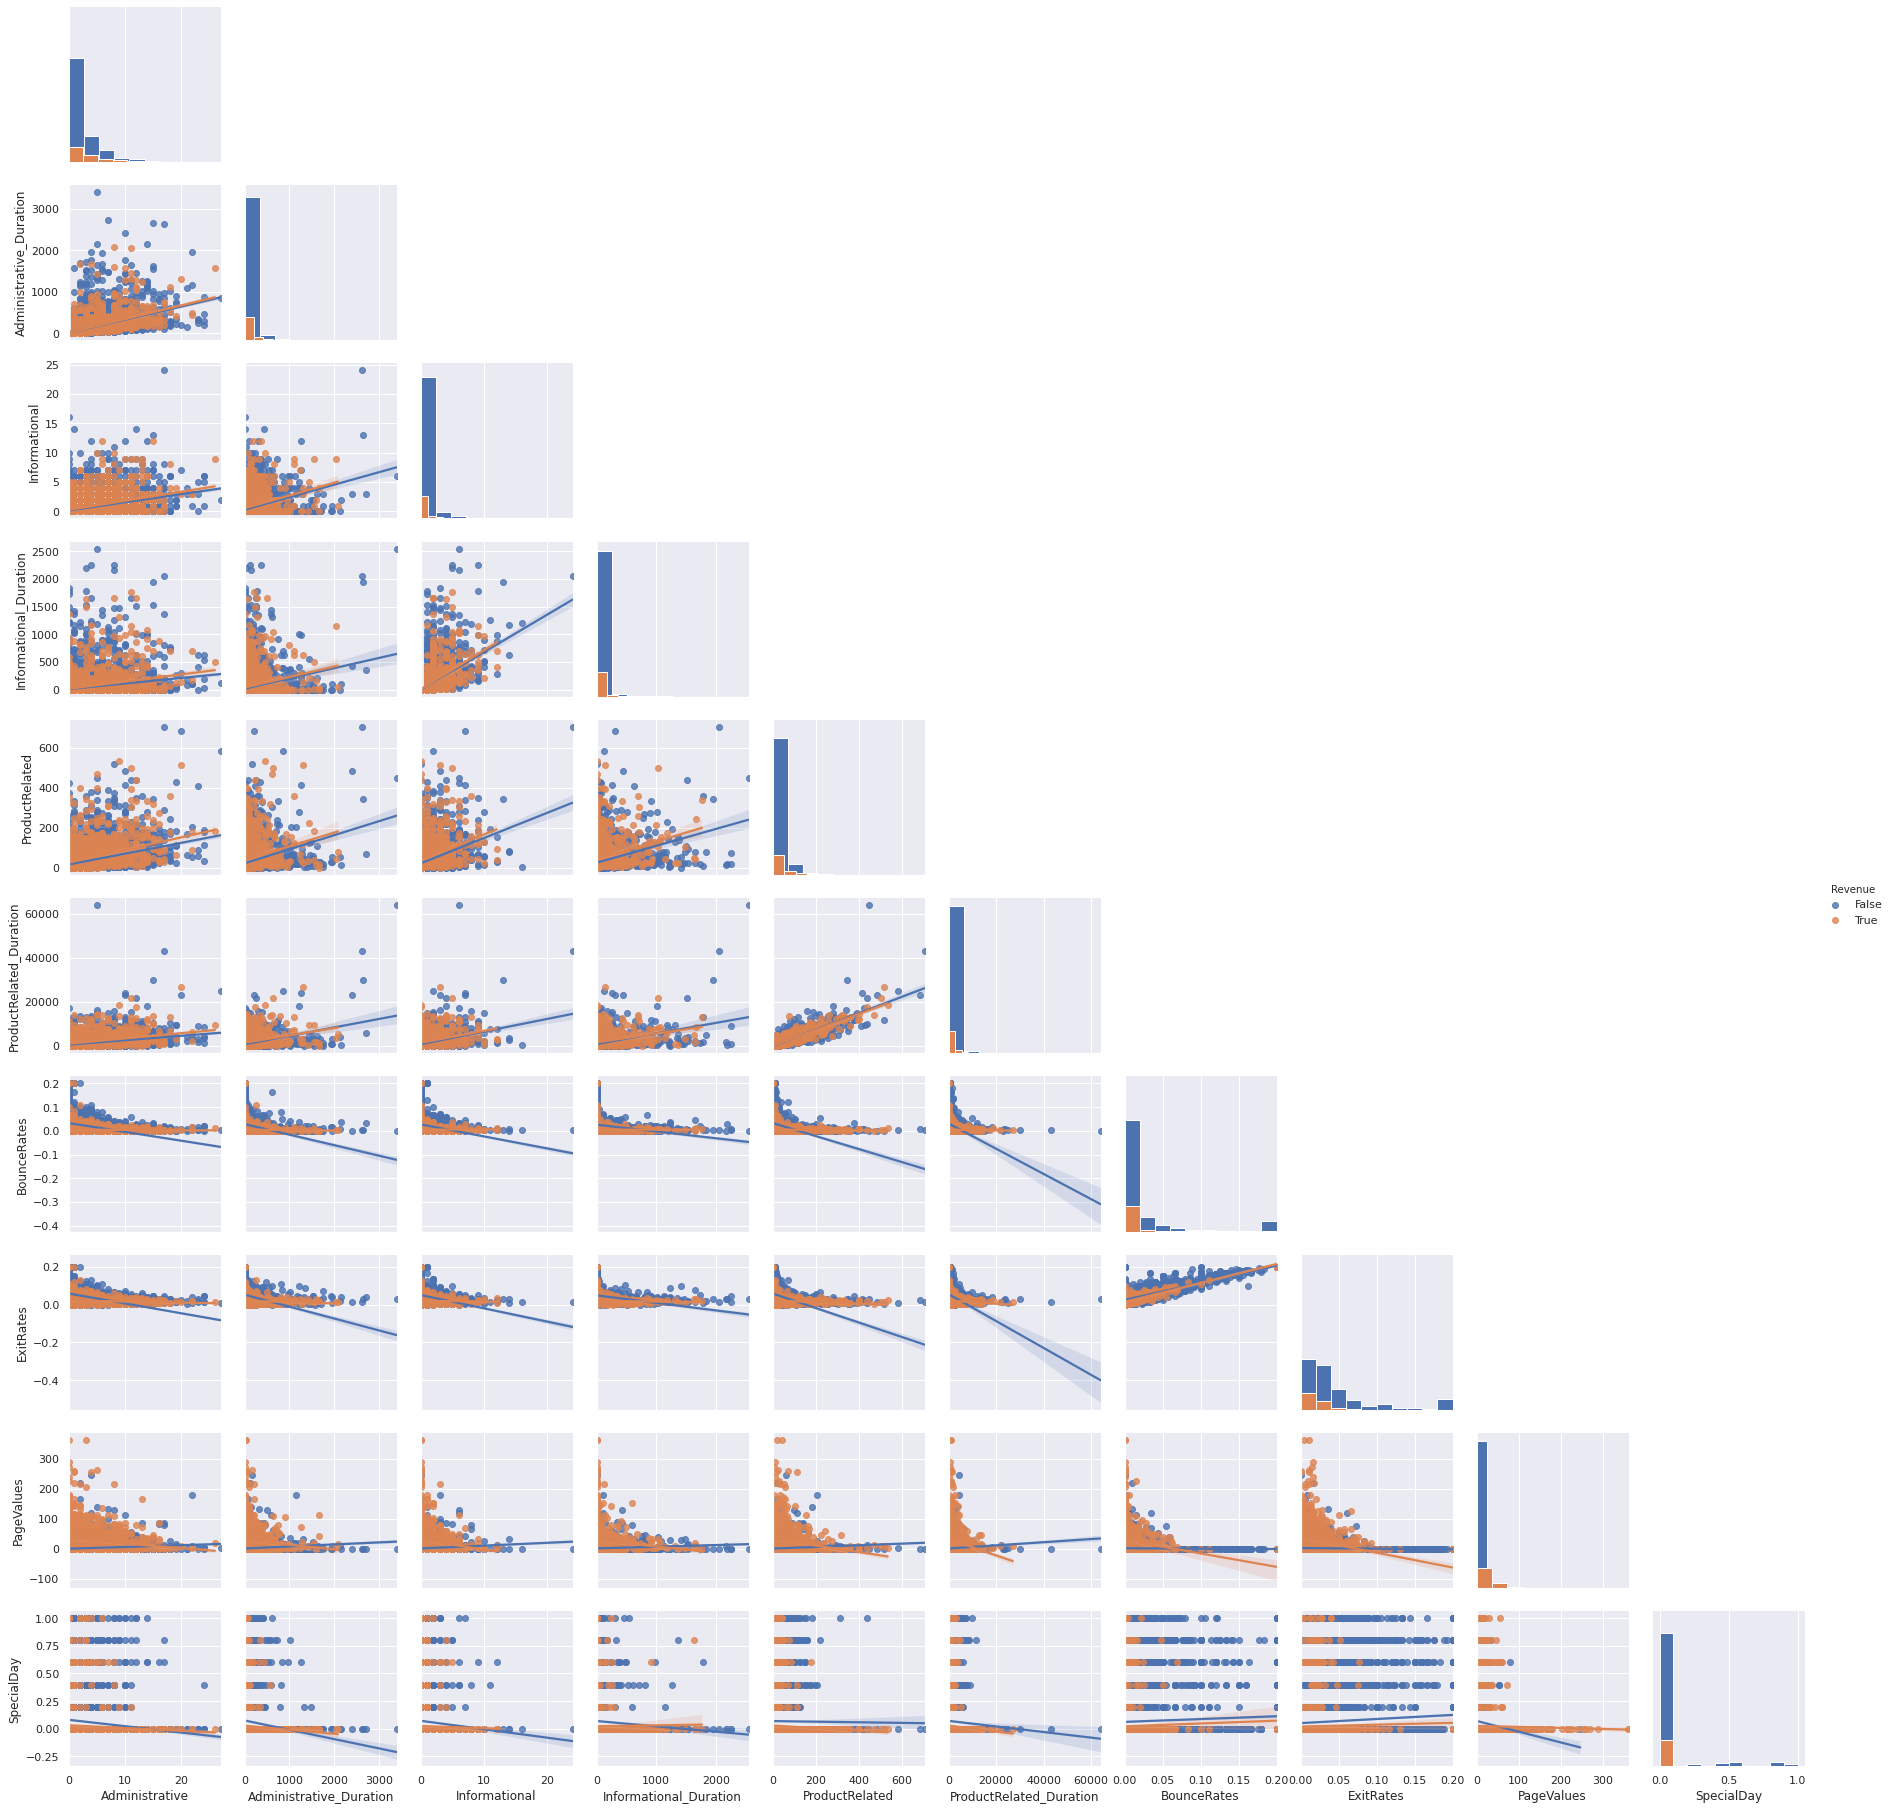

In [ ]:
sns.pairplot(dados[colunas_numericas + variavel_resposta], hue='Revenue', kind = 'reg', diag_kind='hist', corner=True);

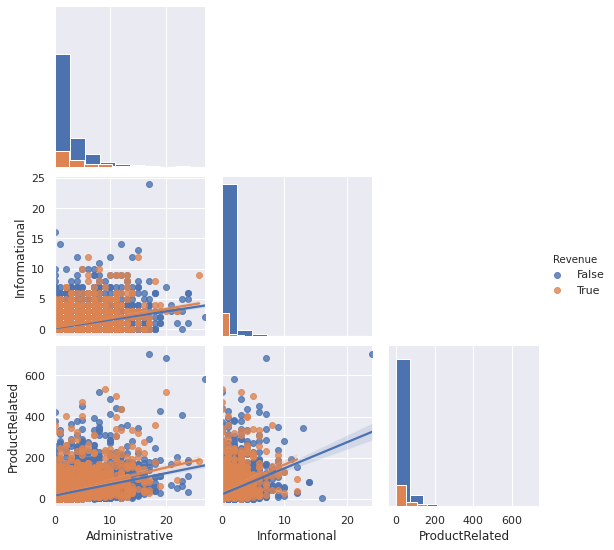

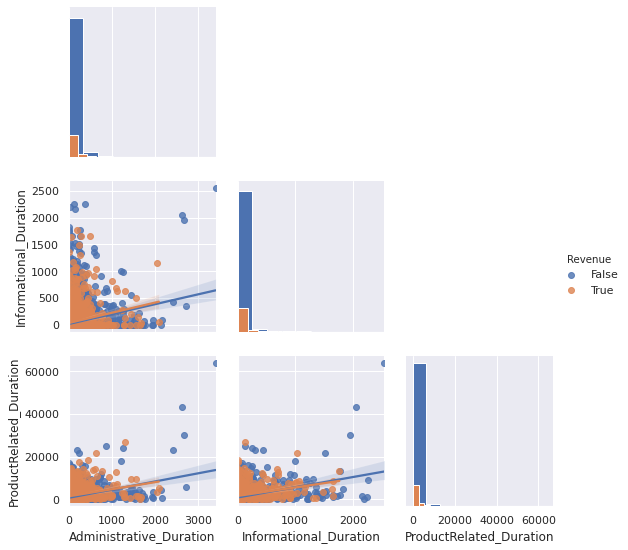

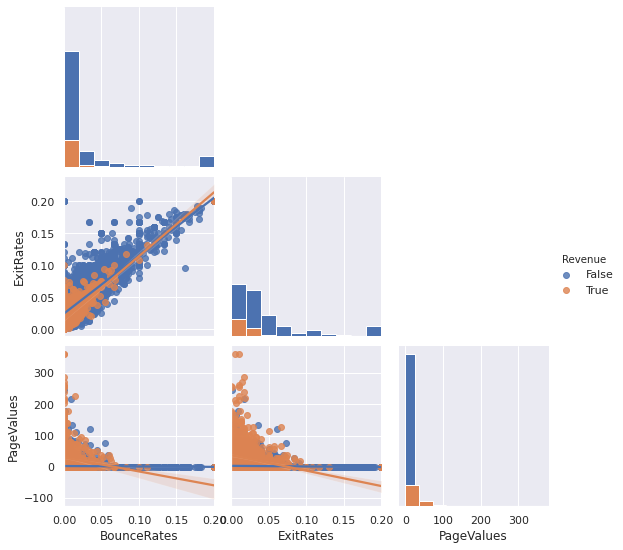

In [ ]:
sns.pairplot(dados,vars=['Administrative', 'Informational', 'ProductRelated'],hue='Revenue', kind = 'reg', diag_kind='hist', corner=True); plt.show()
sns.pairplot(dados,vars=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'],hue='Revenue', kind = 'reg', diag_kind='hist', corner=True); plt.show()
sns.pairplot(dados,vars=['BounceRates', 'ExitRates', 'PageValues'],hue='Revenue', kind = 'reg', diag_kind='hist', corner=True); plt.show()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

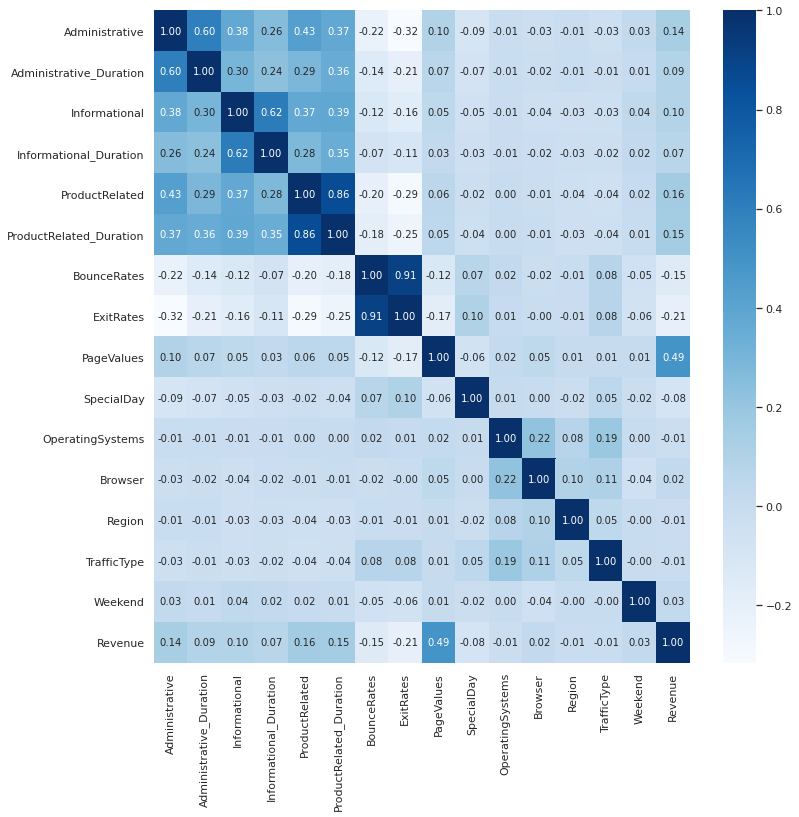

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dados.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.xticks(rotation=90)

## Criação de Modelos de Machine Learning

In [ ]:
# Dividindo conjunto de dados
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

x = dados_transf.drop(['Revenue'], axis=1)
y = dados['Revenue'].astype(int) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

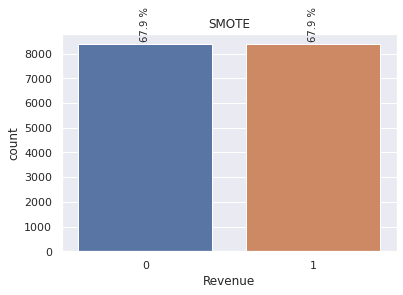

In [ ]:
# Lidando com dados desbalanceados
# Over-sampling do conjunto de dados de treinamento para criar um equilíbrio entre compras e desistências
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=33)
x_train, y_train = sm.fit_sample(x_train, y_train)

ax = sns.countplot(y_train)
ax.set(title='SMOTE')
autolabel(ax)
plt.show()

### Feature Selection

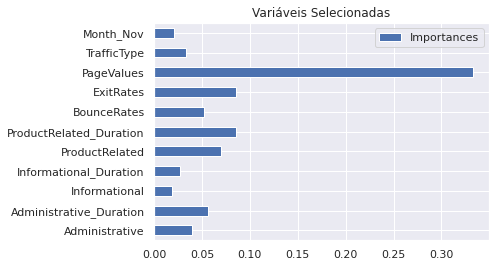

In [ ]:
# Selecionando variáveis mais importantes
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(estimator=RandomForestClassifier()).fit(x,y)
selector.transform(x)
selector.estimator_.feature_importances_
feat_selected = pd.concat([pd.Series(selector.estimator_.feature_importances_, index=x.columns, name="Importances"), pd.Series(selector.get_support(),index=x.columns, name="Get")], axis=1)
feat_selected.loc[feat_selected["Get"] == True, ["Importances"]].plot(kind='barh').set(title='Variáveis Selecionadas')
plt.show()

In [ ]:
x_train = x_train[feat_selected.index]
x_test  = x_test[feat_selected.index]

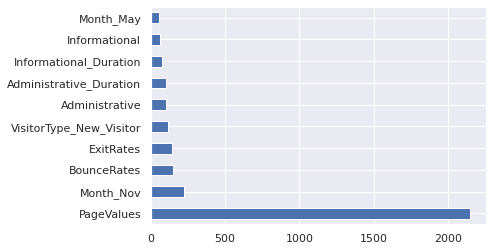

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(chi2, k=10).fit(x, y)

feat_importances = pd.Series(bestfeatures.scores_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


### Aplicação dos modelos

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


ValueError: The underlying estimator SVC has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

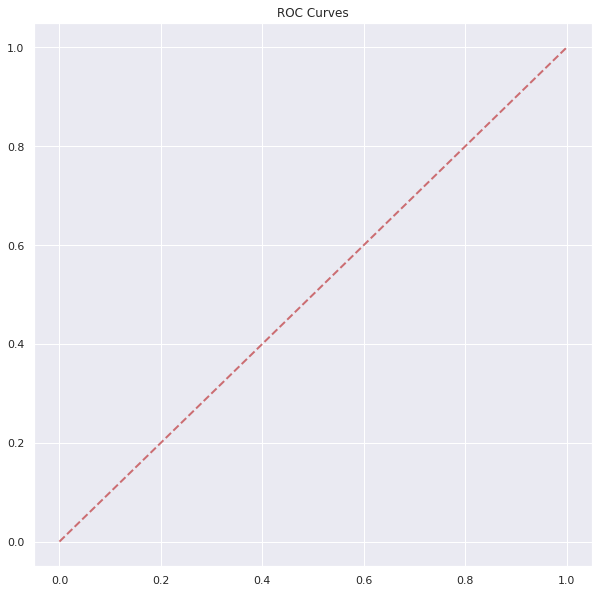

In [ ]:
# Aplicandoos modelos selecionados

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.feature_selection import SelectFromModel

names = ["SVM", 
         "Nearest Neighbors", 
         "Decision Tree", 
         "Random Forest",
         "Extra Trees",
         "AdaBoost",
         "Gradient Boost",
         "Neural Net", 
         "Logistic Regression"
        ]


classifiers = [
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    LogisticRegression()
]

report_list = []
    
hyper_param = [
    [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
    {'n_neighbors': [3, 5, 7]},
    {'min_samples_split': range(2, 40, 10), 'criterion' :['gini', 'entropy']},
    {'n_estimators': [50, 100, 200], 'criterion' :['gini', 'entropy']},
    {'n_estimators': [50, 100, 200], 'criterion' :['gini', 'entropy']},
    {'n_estimators': [50, 100, 200], 'learning_rate':[0.1, 1, 2]},
    {'n_estimators': [50, 100, 200], 'learning_rate':[0.1, 1, 2]},
    {'alpha': [0.00001, 0.0001, 0.001], 'max_iter': [100, 200, 300], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive']},
    {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 1, 5), 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
ax.set(title='ROC Curves')


#for name, clf, hyper in zip(names, classifiers, hyper_param):
#    rs = RandomizedSearchCV(clf, hyper, verbose=0, cv=3, n_jobs=-1, n_iter=10, random_state=5)
#    rs_results = rs.fit(x_train, y_train)
#    y_pred = rs.predict(x_test)
#    print("Melhores Parâmetros: ", rs.best_estimator_)
#    dict1 = classification_report(y_test, y_pred, output_dict=True, target_names=['False','True'])
#    dict1['Classifier'] = name
#    report_list.append(dict1)
#    plot_roc_curve(rs, x_test, y_test, ax=ax, alpha=0.8, name=name)
 

for name, clf, hyper in zip(names, classifiers, hyper_param):
    # Pesquisando os melhores Hiper-parâmetros
    rs = RandomizedSearchCV(clf, hyper, verbose=1, cv=3, n_jobs=-1, n_iter=10, random_state=5)
    rs.fit(x_train, y_train)
    # Selecionando as melhores variáveis (best features)
    model = SelectFromModel(rs.best_estimator_, prefit=True)
    x_train_r = model.transform(x_train)
    # Testando o modelo
    y_pred = rs.predict(x_test)
    report_list.append([name, rs.best_estimator_, x_train_r, classification_report(y_test, y_pred, output_dict=True, target_names=['False','True'])])
    plot_roc_curve(rs, x_test, y_test, ax=ax, alpha=0.8, name=name)
    

In [ ]:
test = {'SVM': {'True': { 'F1': 0.7, 'Recall': 0.6}, 'Acuracia': 0.88}}
xs,ys = zip(*test.values())
print(*test.items())
print(*test.keys())
print(*test.values())
test['SVM']['Acuracia']
test['SVM']['True']['Recall']
test['SVM']['True'].values()
test['SVM'].values()

('SVM', {'True': {'F1': 0.7, 'Recall': 0.6}, 'Acuracia': 0.88})
SVM
{'True': {'F1': 0.7, 'Recall': 0.6}, 'Acuracia': 0.88}


dict_values([{'F1': 0.7, 'Recall': 0.6}, 0.88])

In [ ]:
def autolabelx(ax):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height()+0.01, '%2.1f %%' % (100*p.get_height()), ha='center', va='bottom', rotation=90)

In [ ]:
def autolabely(ax):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_y()+0.5, '%2.1f %%' % (100*p.get_width()), ha='center', va='center')

ValueError: min() arg is an empty sequence

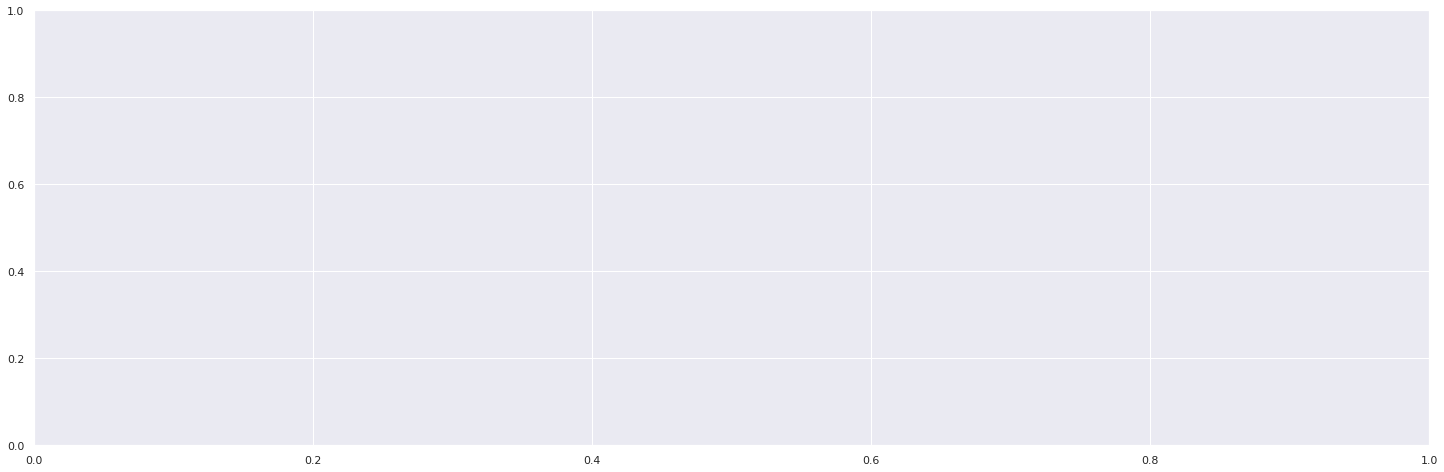

In [ ]:
# Resultado dos Modelos
#sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True, target_names=['False','True'])).iloc[:-1, :-2].T, annot=True, cmap="Blues", fmt=".2f").set(title='Classification Report - '+name)
#plt.show()

list_plot = []

for item in report_list:
    list_plot.append([item['Classifier'], 'False_precision', item['False']['precision']])
    list_plot.append([item['Classifier'], 'False_recall', item['False']['recall']])
    list_plot.append([item['Classifier'], 'False_f1-score', item['False']['f1-score']])
    list_plot.append([item['Classifier'], 'False_support', item['False']['support']])
    list_plot.append([item['Classifier'], 'True_precision', item['True']['precision']])
    list_plot.append([item['Classifier'], 'True_recall', item['True']['recall']])
    list_plot.append([item['Classifier'], 'True_f1-score', item['True']['f1-score']])
    list_plot.append([item['Classifier'], 'True_support', item['True']['support']])
    list_plot.append([item['Classifier'], 'accuracy', item['accuracy']])
#    list_plot.append([item['Classifier'], 'macro avg_precision', item['macro avg']['precision']])
#    list_plot.append([item['Classifier'], 'macro avg_recall', item['macro avg']['recall']])
#    list_plot.append([item['Classifier'], 'macro avg_f1-score', item['macro avg']['f1-score']])
#    list_plot.append([item['Classifier'], 'macro avg_support', item['macro avg']['support']])
#    list_plot.append([item['Classifier'], 'weighted avg_precision', item['weighted avg']['precision']])
#    list_plot.append([item['Classifier'], 'weighted avg_recall', item['weighted avg']['recall']])
#    list_plot.append([item['Classifier'], 'weighted avg_f1-score', item['weighted avg']['f1-score']])
#    list_plot.append([item['Classifier'], 'weighted avg_support', item['weighted avg']['support']])

df = pd.DataFrame(list_plot, columns=['Classifier', 'Metric', 'Value'])

fig, ax = plt.subplots(1,1,figsize=(25,8))

b=sns.barplot(x='Classifier', y='Value', data=df, hue='Metric', ax=ax)
b.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
autolabelx(ax)
plt.show()

g=sns.catplot(y='Classifier', x='Value', col='Metric', data=df, kind="bar", col_wrap=3, orient='h')
for ax in g.axes:
    autolabely(ax)

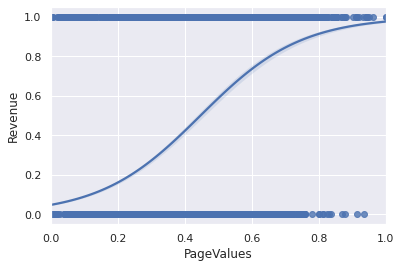

In [ ]:
# Gráfico Regressão Logística
sns.regplot(x='PageValues',y='Revenue', data=dados_transf, logistic=True)

In [ ]:
# Gráfico Árvore de Decisão
from sklearn import tree

estimator = randomforest.estimators_[0]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(estimator,
               feature_names = x_train.columns, 
               class_names=['True' , 'False'],
               filled = True)
plt.show()

NameError: name 'randomforest' is not defined

## Apresentação dos Resultados